# E-commerce project
### <a id="start">Содержание</a>
   [Задание 1](#task1)<br>
   [Задание 2](#task2)<br>
   [Задание 3](#task3)<br>
   [Задание 4](#task4)<br>
   [Задание 5](#task5)<br>
   [Задание 6](#task6)<br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

import requests
from urllib.parse import urlencode
import json

In [2]:
def get_csv_from_yadisk(url):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=url))
    response = requests.get(final_url)
    parse_href = response.json()['href']
    return parse_href

In [12]:
olist_customers = pd.read_csv(get_csv_from_yadisk('https://disk.yandex.ru/d/QXrVDUoQvFhIcg'), sep=',', encoding='cp1251')
olist_orders = pd.read_csv(get_csv_from_yadisk('https://disk.yandex.ru/d/0zWmh1bYP6REbw'), sep=',', encoding='cp1251')
olist_order_items = pd.read_csv(get_csv_from_yadisk('https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'), sep=',', encoding='cp1251')

In [13]:
olist_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [14]:
for column in olist_orders.columns:
    try:
        olist_orders[column] = pd.to_datetime(olist_orders[column])
    except:
        continue

C:\Users\Pavel\AppData\Local\Temp\ipykernel_38308\3071551343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  olist_orders[column] = pd.to_datetime(olist_orders[column])
C:\Users\Pavel\AppData\Local\Temp\ipykernel_38308\3071551343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  olist_orders[column] = pd.to_datetime(olist_orders[column])
C:\Users\Pavel\AppData\Local\Temp\ipykernel_38308\3071551343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  olist_orders[column] = pd.to_datetime(olist_orders[column])


In [15]:
olist_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [16]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## <a id="task1">1. Сколько у нас пользователей, которые совершили покупку только один раз?</a>
Покупкой стоит считать момент когда пользователь оплатил заказ и начался процесс сборки __'processing'__, <br> 
либо отгрузка со склада __'shipped'__, или статус доставлен пользователю __'delivered'__. <br>
Но есть несколько строк со статусом доставлен пользователю, а время подтверждения оплаты нет (эти строки не беру).<br><br>
[К содержанию](#start)

In [17]:
# объединяю таблицы с заказами и пользователями

orders_and_users = olist_orders.merge(olist_customers, how='left', on='customer_id')

In [18]:
# заказы которые доставлены до пользователя, но НЕ оплатили (наверное баг в данных) 

olist_orders[(orders_and_users.order_approved_at.isna()) & (orders_and_users.order_status == 'delivered')].shape[0]

14

In [19]:
# количество заказов у каждого уникального пользователя

number_orders = orders_and_users.loc[(orders_and_users.order_approved_at.notna()) 
                                     & (orders_and_users.order_status.isin(['shipped', 'processing', 'delivered']))] \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'orders'}) \
    .sort_values('orders', ascending=False)

#### Количество пользователей которые совершили покупку один раз.

In [20]:
number_orders.loc[number_orders.orders == 1].shape[0]

91802

## <a id="task2">2. Сколько заказов в месяц в среднем не доставляется по разным причинам?</a>
Не доставленные заказы это те, которые не имеют даты доставки пользователю, а также без статуса __'delivered'__<br><br>
[К содержанию](#start)

In [21]:
# фильтрую данные, товары которые не доставленны

not_delivered = olist_orders[(orders_and_users.order_delivered_customer_date.isna()) \
                             & (orders_and_users.order_status != 'delivered')]

In [22]:
# новая колонка с годом и месяцем

not_delivered['timestamp'] = not_delivered['order_purchase_timestamp'].dt.to_period('M')

C:\Users\Pavel\AppData\Local\Temp\ipykernel_38308\119356824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_delivered['timestamp'] = not_delivered['order_purchase_timestamp'].dt.to_period('M')


In [23]:
not_delivered.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,timestamp
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08


In [24]:
# группирую по месяцам и по статусу заказа и считаю количество заказов,
# затем группирую по статусам чтобы посчитать среднее значение по месяцам

reasons_for_non_delivery = not_delivered.groupby(['timestamp', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'not_delivered'}) \
    .groupby('order_status', as_index=False) \
    .agg({'not_delivered': 'mean'}) \
    .round(2) \
    .sort_values('not_delivered', ascending=False)

#### Среднее количество заказов в месяц которые не доставляются

In [25]:
reasons_for_non_delivery

,order_status,not_delivered
5,shipped,48.13
6,unavailable,29.00
1,canceled,25.79
4,processing,15.84
3,invoiced,14.95
2,created,1.67
0,approved,1.00


## <a id="task3">3. По каждому товару определить, в какой день недели товар чаще всего покупается.</a>
[К содержанию](#start)

In [26]:
# объединяю таблицы заказов и товаров

order_items = olist_orders.merge(olist_order_items, how='inner', on='order_id')

In [27]:
# использую фильтр для товаров которые считаются купленными

order_items_buy = order_items.loc[(order_items.order_approved_at.notna()) 
                                  & (order_items.order_status.isin(['shipped', 'processing', 'delivered']))]

In [28]:
order_items_buy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [29]:
# новая колонка с днем недели

order_items_buy['day_name'] = order_items_buy.order_purchase_timestamp.dt.day_name()

C:\Users\Pavel\AppData\Local\Temp\ipykernel_38308\3390162444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items_buy['day_name'] = order_items_buy.order_purchase_timestamp.dt.day_name()


In [30]:
# узнаю количество купленного товара по дням недели, и сортирую по убыванию 

purchases_by_day = order_items_buy.groupby(['product_id', 'day_name'], as_index=False) \
    .agg({'seller_id': 'count'}) \
    .rename(columns={'seller_id': 'purchases'}) \
    .sort_values('purchases', ascending=False) 

In [31]:
# из отсортированной таблицы покупок по дням недели удалил дубликаты, 
# метод по умолчанию оставляет первое встреченное значение т.е. самое большое

max_purchases_by_day = purchases_by_day.drop_duplicates('product_id')

In [32]:
purchases_by_day[purchases_by_day.product_id == '422879e10f46682990de24d770e7f83d']

,product_id,day_name,purchases
15763,422879e10f46682990de24d770e7f83d,Wednesday,93
15761,422879e10f46682990de24d770e7f83d,Thursday,79
15757,422879e10f46682990de24d770e7f83d,Friday,77
15762,422879e10f46682990de24d770e7f83d,Tuesday,67
15758,422879e10f46682990de24d770e7f83d,Monday,64
15759,422879e10f46682990de24d770e7f83d,Saturday,57
15760,422879e10f46682990de24d770e7f83d,Sunday,47


#### Таблица показывает в какой день недели купили максимальное количество определенного товара

In [33]:
max_purchases_by_day

,product_id,day_name,purchases
15763,422879e10f46682990de24d770e7f83d,Wednesday,93
36172,99a4788cb24856965c36a24e339b6058,Monday,92
40673,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19940,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13419,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23808,643a4049ae3e6df63858575f28cd7b21,Friday,1
23810,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1
23812,643f86cfb81c8ef89293524c5cd78435,Thursday,1
23813,64436613065a92eedd50d29d4ec0cd43,Friday,1


## <a id="task4">4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель.</a>
* Посчитать сколько покупок у пользователя в месяц
* Сколько недель в каждом месяце где есть покупки
* Посчитать отношение всех покупок в месяц к числу недель в этом месяце<br><br>
[К содержанию](#start)

In [34]:
# объединяю все таблицы

full_data = olist_orders.merge(olist_customers, on='customer_id').merge(olist_order_items, on='order_id')

In [35]:
# беру именно покупки

full_data = full_data.loc[(full_data.order_approved_at.notna()) 
                          & (full_data.order_status.isin(['shipped', 'processing', 'delivered']))]

In [36]:
full_data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [37]:
# делаю колонку с годом и месяцем

full_data['year_and_month'] = full_data.order_purchase_timestamp.dt.to_period('M')

In [38]:
# сколько заказов у пользователя по месяцам

purchases_by_month = full_data.groupby(['customer_unique_id', 'year_and_month'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'purchases'}) \
    .sort_values('purchases', ascending=False)

purchases_by_month.head(3)

,customer_unique_id,year_and_month,purchases
75624,c8460e4251689ba205045f3ea17884a1,2018-08,24
26183,4546caea018ad8c692964e3382debd19,2017-07,21
74021,c402f431464c72e27330a67f7b94d4fb,2018-02,20


In [39]:
# чтобы узнать количество недель в месяце нужно дату привести к типу DateTime
# потому что метод "days_in_month" не работает с типом Period

purchases_by_month['date'] = purchases_by_month.year_and_month.dt.strftime("%Y-%m") + '-01'

In [40]:
purchases_by_month['date'] = pd.to_datetime(purchases_by_month.date)

In [41]:
purchases_by_month['month'] = purchases_by_month.date.dt.days_in_month

In [42]:
purchases_by_month['weeks_in_month'] = purchases_by_month.month / 7

In [43]:
purchases_by_month.head(3)

,customer_unique_id,year_and_month,purchases,date,month,weeks_in_month
75624,c8460e4251689ba205045f3ea17884a1,2018-08,24,2018-08-01,31,4.428571
26183,4546caea018ad8c692964e3382debd19,2017-07,21,2017-07-01,31,4.428571
74021,c402f431464c72e27330a67f7b94d4fb,2018-02,20,2018-02-01,28,4.000000


In [44]:
# считаю среднее количество покупок в неделю

purchases_by_month['purchases_per_week'] = (purchases_by_month.purchases / purchases_by_month.weeks_in_month).round(2)

In [45]:
# удаляю лишнии колонки

purchases = purchases_by_month.drop(['date', 'month'], axis=1)

#### Покупок в неделю у каждого пользователя

In [46]:
purchases

,customer_unique_id,year_and_month,purchases,weeks_in_month,purchases_per_week
75624,c8460e4251689ba205045f3ea17884a1,2018-08,24,4.428571,5.42
26183,4546caea018ad8c692964e3382debd19,2017-07,21,4.428571,4.74
74021,c402f431464c72e27330a67f7b94d4fb,2018-02,20,4.000000,5.00
39911,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20,4.428571,4.52
5817,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,18,4.285714,4.20
...,...,...,...,...,...
33992,59bfe97acaf7979ebbc663af8bb1827d,2018-01,1,4.428571,0.23
33991,59bf40d8d661b01628706ada5ca977a8,2018-06,1,4.285714,0.23
33990,59bf0cc350e827e3835f58e7df080d33,2017-11,1,4.285714,0.23
33989,59beea6727534eabf3af451f092fb8b5,2018-08,1,4.428571,0.23


## <a id="task5">5. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.</a>

Покупкой стоит считать момент когда пользователь оплатил заказ (имеется время подтверждения оплаты заказа). <br>
* Посчитать когда пользователи сделали первую покупку.
* Объеденить пользователей в сегменты по месяцу.
* Расчитать Retention Rate для каждой когорты по месяцам<br><br>
[К содержанию](#start)

In [47]:
orders_and_users = olist_orders.merge(olist_customers, how='left', on='customer_id')

In [48]:
# фильтрую данные

orders_and_users = orders_and_users.loc[(orders_and_users.order_approved_at.notna()) 
                                        & (orders_and_users.order_status.isin(['shipped', 'processing', 'delivered']))]

In [49]:
orders_and_users = orders_and_users.query('"2017-01-01" <= order_approved_at <= "2018-01-01"')

In [50]:
# добавляю текущкю дату в удобном формате

orders_and_users['current_month'] =  pd.to_datetime(orders_and_users['order_approved_at']).dt.year.map(str) \
                                 + "-" + pd.to_datetime(orders_and_users['order_approved_at']).dt.month.map(str)
orders_and_users['current_month'] = pd.to_datetime(orders_and_users['current_month']).dt.date

In [51]:
# дата первой покупки у клиента

orders_and_users['cohort'] = orders_and_users.groupby('customer_unique_id')['current_month'].transform('min')

In [52]:
# период по которому сравниваю

orders_and_users['cohort_period'] = (pd.to_datetime(orders_and_users.current_month).dt.month 
                                  - pd.to_datetime(orders_and_users.cohort).dt.month)

In [53]:
# число пользователей в первой покупке

cohort_counts = orders_and_users \
    .groupby(['cohort', 'cohort_period'])['customer_unique_id'] \
    .nunique() \
    .to_frame() \
    .rename(columns={'customer_unique_id':'users'}) \
    .sort_values('cohort')

In [54]:
# retention

cohort_counts['retention_rate'] = cohort_counts['users'] / cohort_counts.groupby(['cohort'])['users'].transform('max')

In [55]:
user_retention = cohort_counts.pivot_table(index='cohort', columns='cohort_period', values='retention_rate')

#### Самый большой retention за 3 месяц у кагорты 2017-05-01

C:\Users\Pavel\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: xlabel='cohort_period', ylabel='cohort'>

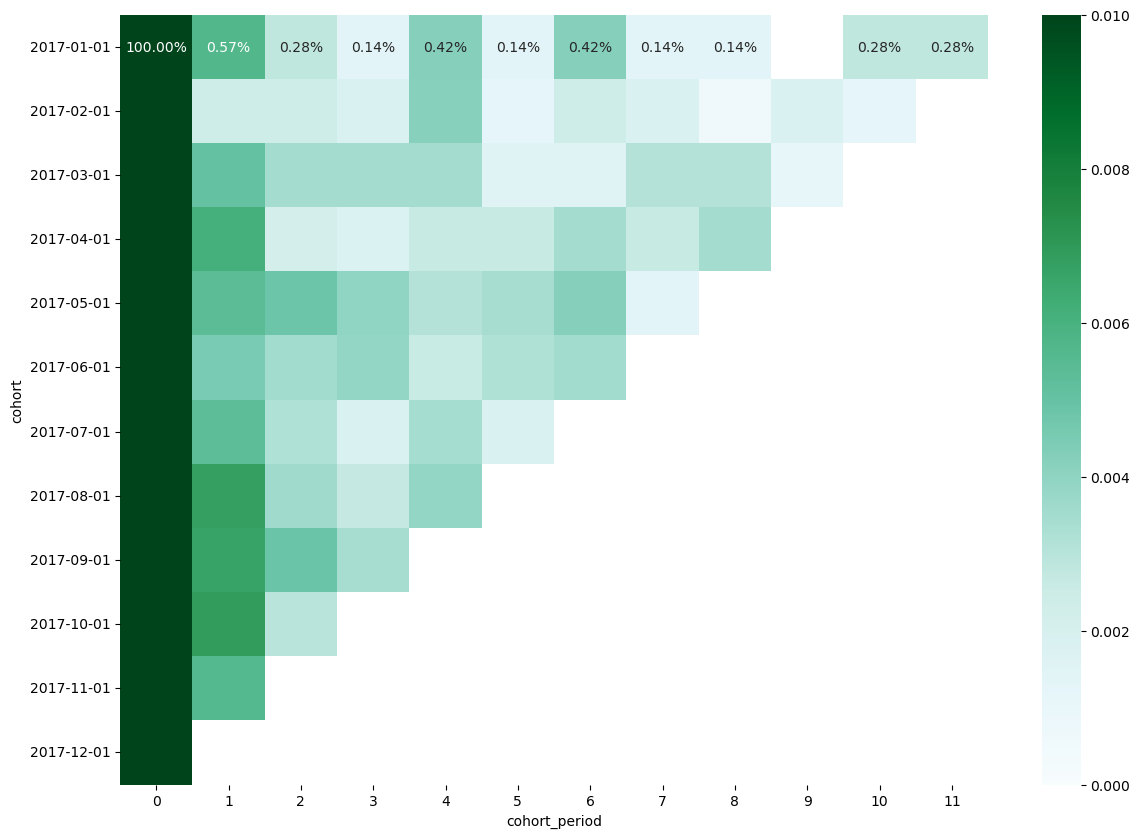

In [57]:
plt.figure(figsize = (14, 10))
sns.heatmap(data = user_retention,
            annot = True,
            fmt = '.2%',
            vmin = 0.0,
            vmax = 0.01,
            cmap = 'BuGn')

In [58]:
ur_style = (user_retention
            .style
            .set_caption('User retention by cohort')
            .highlight_max(axis='index')
            .highlight_null('white')
            .format("{:.2%}", na_rep=""))
ur_style

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01-01,100.00%,0.57%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.28%,0.28%
2017-02-01,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,
2017-03-01,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,,
2017-04-01,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,,,
2017-05-01,100.00%,0.54%,0.48%,0.40%,0.31%,0.34%,0.43%,0.14%,,,,
2017-06-01,100.00%,0.45%,0.35%,0.39%,0.26%,0.32%,0.35%,,,,,
2017-07-01,100.00%,0.53%,0.32%,0.19%,0.34%,0.19%,,,,,,
2017-08-01,100.00%,0.68%,0.36%,0.27%,0.39%,,,,,,,
2017-09-01,100.00%,0.66%,0.49%,0.34%,,,,,,,,


In [59]:
user_retention.iloc[:,3].idxmax()

datetime.date(2017, 5, 1)

## <a id="task6">6. RFM-сегментация пользователей</a>

R - время от последней покупки пользователя до текущей даты, <br>
F - суммарное количество покупок у пользователя за всё время, <br>
M - сумма покупок товаров за всё время.<br>

Временные рамки - взял весь период что есть.
Текущей датой считаю максимальный день покупки плюс еще один день.
Границы сегментов взял квантили, они боллее гибкии.<br><br>
[К содержанию](#start)

In [60]:
olist = olist_orders.merge(olist_customers, on='customer_id').merge(olist_order_items, on='order_id')

In [61]:
olist = olist.loc[(olist.order_approved_at.notna()) 
                  & (olist.order_status.isin(['shipped', 'processing', 'delivered']))]

In [62]:
olist.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [63]:
# "сегодня" условно буду считать на один день больше чем максимальная дата покупки в таблице

today = olist.order_approved_at.max() + timedelta(days=1)

In [64]:
olist['days_since_order'] = olist['order_approved_at'].apply(lambda x: (today - x).days)

In [65]:
# агрегирующие функции

aggr = {
    'days_since_order': lambda x: x.min(),
    'product_id': lambda x: len(x),
    'price': lambda x: x.sum()
}

In [66]:
# для каждого клиента считаю rfm

rfm = olist.groupby('customer_unique_id') \
    .agg(aggr) \
    .reset_index() \
    .rename(columns={'days_since_order': 'recency', 'product_id': 'frequency', 'price': 'monetary'})

In [67]:
# для присвоения баллов использую квантили 

quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 388.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [88]:
# функции для назначения баллов

def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['monetary'][.2]:
        return 1
    elif x <= quintiles['monetary'][.4]:
        return 2
    elif x <= quintiles['monetary'][.6]:
        return 3
    elif x <= quintiles['monetary'][.8]:
        return 4
    else:
        return 5  

def f_score(x):
    if x == 1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 6:
        return 3
    elif x <= 10:
        return 4
    else:
        return 5

In [89]:
# назначаю баллы

rfm['r'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['f'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['m'] = rfm['monetary'].apply(lambda x: m_score(x))

In [90]:
rfm['rfm_Score'] = rfm['r'].map(str) + rfm['f'].map(str) + rfm['m'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414,Перспективные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,В спячке
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,В спячке
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,В спячке


#### Описание сегментов

* В спячке - последняя покупка была давно и товаров мало.
* В зоне риска - покупал давно, но товаров больше среднего.
* Нельзя потерять - покупка была давно, но было много товаров.
* Почти в спячке - покупал не так давно, товаров было мало.
* Нужно внимание - покупал не так давно и количество товаров выше среднего.
* Постоянные клиенты - покупал недавно и много товаров.
* Перспективные - покупал недавно, мало товаров.
* Новые клиенты - купил недавно, мало товаров.
* Потенциальный постояник - купил не давно, среднее количество товара.
* Лучшие клиенты - покупает регулярно, и большое количество.

In [94]:
segt_map = {
    r'[1-2][1-2]': 'В спячке',
    r'[1-2][3-4]': 'В зоне риска',
    r'[1-2]5': 'Нельзя потерять',
    r'3[1-2]': 'Почти в спячке',
    r'33': 'Нужно внимание',
    r'[3-4][4-5]': 'Постоянные клиенты',
    r'41': 'Перспективные',
    r'51': 'Новые клиенты',
    r'[4-5][2-3]': 'Потенциальный постояник',
    r'5[4-5]': 'Лучшие клиенты'
}

rfm['segment'] = rfm['r'].map(str) + rfm['f'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414,Перспективные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,В спячке
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,В спячке
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,В спячке


In [95]:
rfm['segment'].value_counts()

segment
В спячке                   37213
Почти в спячке             18820
Новые клиенты              16714
Перспективные              16480
Потенциальный постояник     4715
В зоне риска                 449
Нужно внимание               189
Постоянные клиенты            57
Лучшие клиенты                27
Нельзя потерять                8
Name: count, dtype: int64

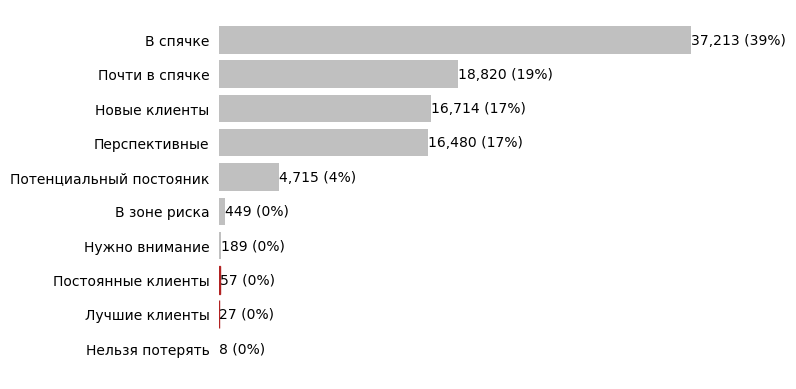

In [96]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Лучшие клиенты', 'Постоянные клиенты']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

__Всего 84 клиента покупают много товаров и регулярно, 39% клиентов давно не покупали.__